# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 3

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **20 марта в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

*Замечания.* Решения теоретических пунктов можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab.

Фотографии принимаются только в хорошем качестве, следите за освещением и почерком. На фотографиях также указывайте номера задач.

### Задача 1. Несмещенность оценок.

**Теория**

Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим статистику $S^2=\frac1n\sum\limits_{i=1}^n(X_i-\overline{X})^2$.

a). Докажите, что статистика $S^2$ равна $\overline{X^2}-\overline{X}^2$ и является состоятельной оценкой $\sigma^2$;

b). Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

c*). Докажите, что если конечны первые четыре момента ( $\mathsf{E}X, \mathsf{E}X^2, \mathsf{E}X^3, \mathsf{E}X^4$) распределения  $\mathsf{P}$, то статистика $S^2$ является асимптотически нормальной оценкой $\sigma^2$ и найдите ее асимптотическую дисперсию.
        

**Ответ:**
прислал как фото в ботика

**Практика** 

Пусть теперь $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$.

Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными? Поясните свой ответ. 

**Ответ:**
ответ есть в пункте б прошлого вопроса

Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta_1}, ... , \widehat{\theta_k}$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, 1)$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta_1}, $y$), ... , (\widehat{\theta_k}, y)$ и среднее *этих оценок* $(\overline{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1) координаты для двух различных типов оценок ($S^2, \frac{n}{n-1}S^2$).

* Повторите действие четыре раза для $n \in \{5, 10, 100, 500\}$. В итоге получится четыре графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте данный шаблон для визуализации значений:

In [ ]:
# Для каждой оценки:
plt.scatter(<независимые оценки> , np.zeros(k) + y, 
            alpha=0.1, s=100, color=<цвет>, label=<метка>)
plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200,
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
plt.title('sample size = %d' % k)
plt.yticks([])
plt.legend()

**Решение:**

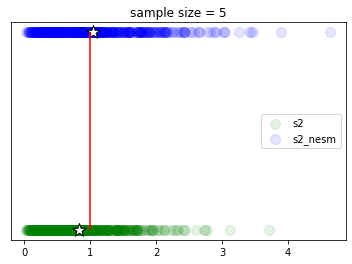

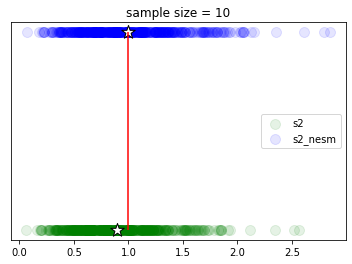

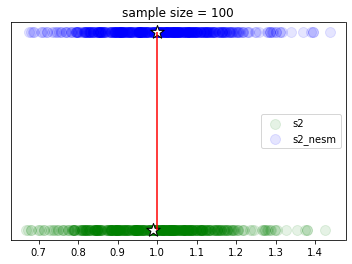

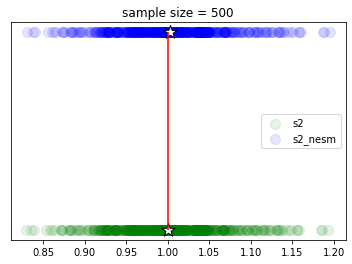

In [2]:
for size in [5,10,100,500]:
    samples_count = 500 # количество выборок   size-размер выборки

    sample = np.array(sps.norm.rvs(size=size*samples_count)) #можно генирировать сразу k выборок, тк у нас все генерации независимы в совокупности
    sample=sample.reshape((samples_count,size))
    s2=np.sum(sample**2,axis=1)/sample.shape[1]-(np.sum(sample,axis=1)/sample.shape[1])**2  #`в соотв с выводом пункта а
    s2_nesm=s2*sample.shape[1]/(sample.shape[1]-1)
    # Для каждой оценки:
    y1=0
    y2=1
    plt.scatter(s2 , np.zeros(samples_count)+y1, 
                alpha=0.1, s=100, color='green', label='s2')
    plt.scatter(s2.mean(), y1, marker='*', s=200, 
                color='w', edgecolors='black')
    plt.scatter(s2_nesm , np.zeros(samples_count) + y2, 
                alpha=0.1, s=100, color='blue', label='s2_nesm')
    plt.scatter(s2_nesm.mean(), y2, marker='*', s=200, 
                color='w', edgecolors='black')

    # Для всего графика:
    plt.vlines(1, y1, y2, color='r')
    plt.title('sample size = %d' % size)
    plt.yticks([])
    plt.legend()
    plt.show()



**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из п. 1.1 достаточно большого размера и посчитать оценки по префиксам, используя функции из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. Какие из оценок являются асимптотически несмещёнными, т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$?

**Решение:**

Text(0, 0.5, 'theta_mean')

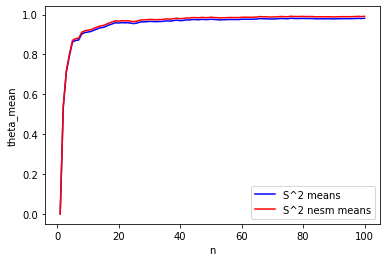

In [9]:
samples_count = 500 # количество выборок   size-размер выборки
size=100
sample = np.array(sps.norm.rvs(size=size*samples_count)) 
sample=sample.reshape((samples_count,size))
s2_mean=(sample**2).cumsum(axis=1)/(np.arange(size)+1)-(sample.cumsum(axis=1)/(np.arange(size)+1))**2
s2_nesm_mean=s2*sample.shape[1]/(sample.shape[1]-1)
plt.plot(np.arange(size)+1, s2_mean.mean(axis=0),color='blue',label='S^2 means')
plt.plot(np.arange(size)+1, s2_mean.mean(axis=0)*size/(size-1),color='red',label='S^2 nesm means')
plt.legend()
plt.xlabel('n')
plt.ylabel('theta_mean')


Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 
Простыми словами, если оценка несмещенная, то она соответвует параметру, который мы оцениваем. Эксперименты показывают, что оценка с (n-1) в знаменателе ближе к реальному параметру(но зато показывают, что и вторая оценка АСИМПТОТИЧЕСКИ несмещенная n/(n-1)->1). В физике используют n-1, тк хотят получить несмещенную оценку

### Задача 2. Гамма-излучение.

Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

*Замечание:* Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить подписи к графику.

**Решение:**

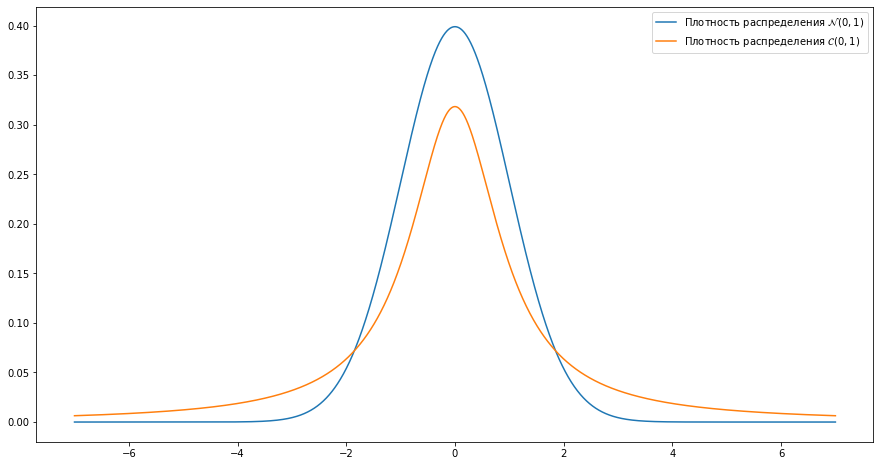

In [3]:
grid1 = np.linspace(-7, 7, 3000)
norm_pdf_values = sps.norm.pdf(grid1)
cauchy_pdf_values = sps.cauchy.pdf(grid1)


plt.figure(figsize=(15, 8))
plt.plot(grid1, norm_pdf_values, label='Плотность распределения $\\mathcal{N}(0,1)$')
plt.plot(grid1, cauchy_pdf_values, label='Плотность распределения $\\mathcal{C}(0,1)$')
plt.legend();

**Вывод:** Стандартное распределение Коши чем-то похоже на стандартное нормальное, только с большей дисперсией

**2.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши ($\theta = 0$). Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\widehat{\mu}$ —  выборочная медиана;
- Oдношаговая оценка, построенная по выборочной медиане (см. лекцию 4). 

В случае выборочной медианы можно использовать цикл по подвыборкам.

На одном графике изобразите зависимость значений этих оценок от $n$.
Сравните асимптотические дисперсии оценок (для тех оценок, для которых они существуют). Сделайте вывод.

**Замечание:** если некоторые оценки имеют большой разброс, и разница между графиками зависимостей оценок с малыми значениями недостаточно заметна, стоит сделать два графика, на одном из которых будут изображены все оценки, а на втором &mdash; только достаточно хорошие (мало отличающиеся от оцениваемого параметра), то есть этот график будует иметь меньший масштаб по оси $y$.

**Решение:**

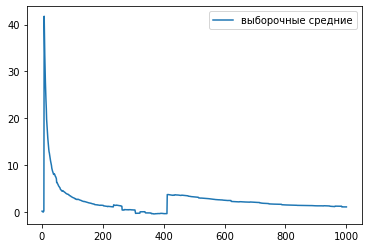

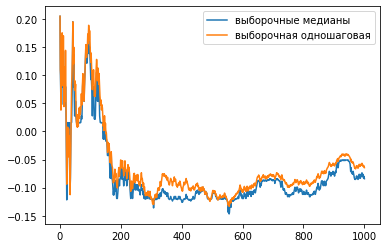

In [39]:
sample=np.random.standard_cauchy(size=1000)
means=sample.cumsum()/(np.arange(len(sample))+1)
meds=[]
for i in range(len(sample)):
    meds.append(np.median(sample[:i+1]))
onestep=[]
for i in range(len(sample)):
    a=((sample[:i+1]-meds[i])/(1+(sample[:i+1]-meds[i])**2)).sum()    #завел вспомогательные переменные, чтоб обсчитатьэти суммы
    b=((1-(sample[:i+1]-meds[i]))/((1+(sample[:i+1]-meds[i])**2)**2)).sum()
    onestep.append(meds[i]+a/b)
plt.plot(np.arange(len(sample))+1, means, label='выборочные средние')
plt.legend()
plt.show()
plt.plot(np.arange(len(sample))+1, meds, label='выборочные медианы')
plt.plot(np.arange(len(sample))+1, onestep, label='выборочная одношаговая')
plt.legend()

**Вывод:** асимптотическая дисперсия для выборочной медианы порядка 2,47, а для одношаговой оценки, построенной по выборочной медиане 2. На графике это заметно, одношаговая оценка ближе к 0. Выборочное среднее же не является АНО(тк нет матожидания), это тоже явно видно из графиков

## Задача 3. Белые мышки.


**Теория**

Пусть $X_1, ... X_n$ &mdash; выборка из распределения $Gamma(\theta, \beta)$ &mdash; гамма-распределение с плотностью $p_{\theta}(x) = \frac{\theta^{\beta} x^{\beta-1}}{\Gamma(\beta)} e^{-\theta x} $, где $\beta$ фиксировано, а $\Gamma(\beta)$ &mdash; [гамма-функция](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F) ;



Найдите 


- 1). оценку максимального правдоподобия $\theta$;

- 2). ее асимптотическую дисперсию, считая выполненными условия теоремы об ОМП. 

**Ответ**

**Практика**

Скачайте <a href="https://www.kaggle.com/ruslankl/mice-protein-expression
">датасет</a> с данными об экспрессии белков у белых мышей. Данный датасет состоит из таблицы значений уровней экспрессии 77 различных белков в мозге у мышей. Каждая строка соответствует одной особи, каждый столбец соответствует одному белку. На столбцы Genotype, Treatment и подобные пока не обращаем внимания. 

In [11]:
df = pd.read_csv("./Data_Cortex_Nuclear.csv") 

Выберем для анализа белки ITSN1_N, DYRK1A_N, pBRAF_N, pCREB_N.

In [12]:
columns = ['ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N']  

df_chosen_columns = df[columns]

Постройте гистограммы изучаемых признаков.

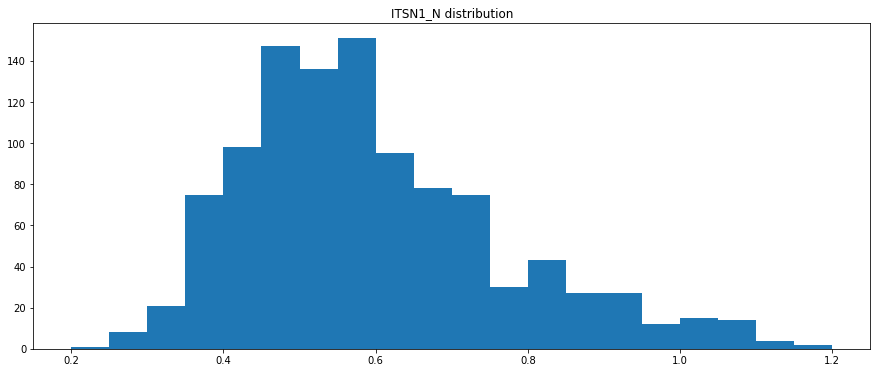

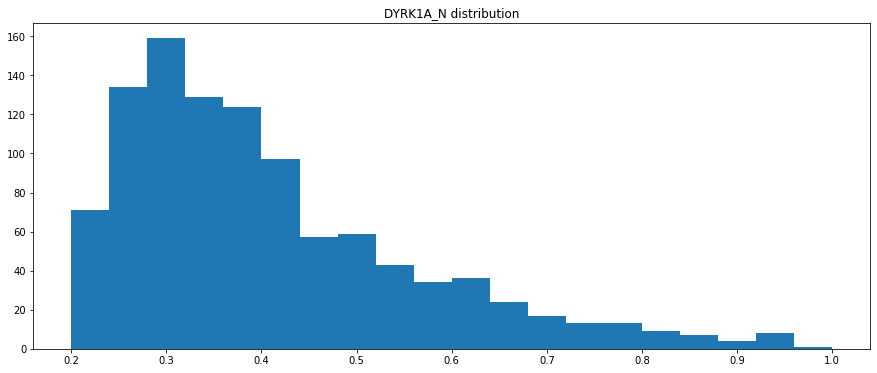

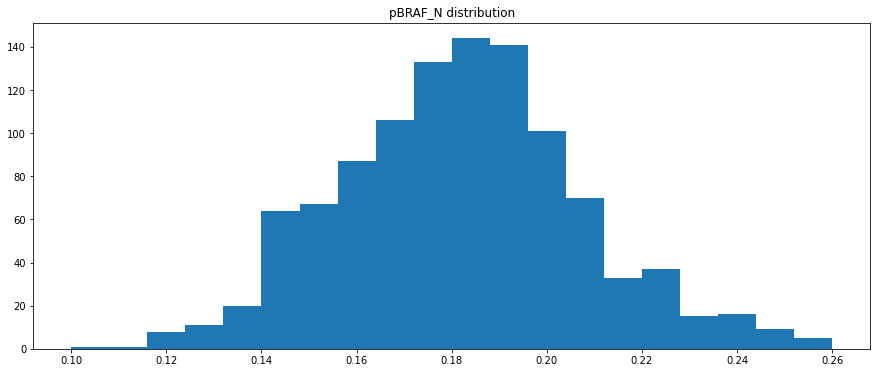

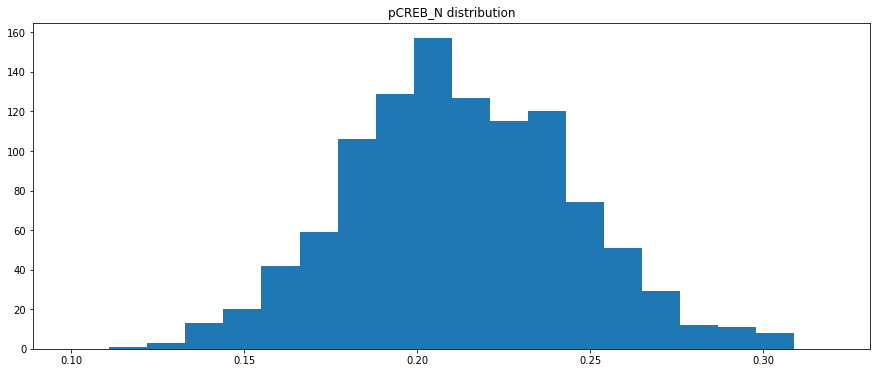

In [14]:
ranges_without_outliers = {'ITSN1_N':(0.2,1.2)
                           , 'DYRK1A_N':(0.2,1),
                           'pBRAF_N':(0.1,0.26),
                           'pCREB_N':(0.1,0.32)
}


for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20)
    plt.title(column + ' distribution')

**1.** 

В этой части задания вам предлагается найти оценки максимального правдоподобия (ОМП) по формулам, полученным в теоретической части задания и на семинаре. Вам также поможеет задание из Яндекс.Контеста. Если вам не удалось посчитать теоретически какую-то из нужных ОМП, сделайте хотя бы для той, которую посчитали.

Предположим, что признаки имеют следующие распределения: 


*   'pBRAF_N' и 'pCREB_N' &mdash; нормальное распределение с неизвестными параметрами $\theta = (a, \sigma^2)$;
*  'ITSN1_N' &mdash; гамма-распределение $Gamma(\theta, \beta)$ с плотностью $p_{\theta}(x) = \frac{\theta^{\beta} x^{\beta-1}}{\Gamma(\beta)} e^{-\theta x} $ с неизвестным параметром $\theta$ и известным параметром $\beta$, равным 13.5;
* 'DYRK1A_N' &mdash; гамма-распределение $Gamma(\theta, \beta)$ с неизвестным параметром $\theta$ и известным параметром $\beta$, равным 9.

Не пугайтесь гамма-распределения, оно тоже часто встречается, как мы и увидим в этой задаче.

*Замечание:* в `scipy.stats` у гамма-распределения параметр `a` означает $\beta$, а параметр `scale` означает $1 / \theta$.


Удалите неопределенные значения `nan` и выбросы и посчитайте ОМП для данных выборок признаков, предполагая, что они имеют указанные выше распределения. Подсчет ОМП оформите в виде функций, принимающих реализацию выборки и $\beta$ в случае гамма-распределения. Выведите полученные значения параметров.

Для избавления от копипаста используйте циклы и функции. Копипаст является серезным источником ошибок на практике.

In [28]:
df_clear=df_chosen_columns.dropna() #там только 3 строчки целиком не подходят
df_clear=df_clear[1.2>df_clear['ITSN1_N']]
df_clear=df_clear[df_clear['ITSN1_N']>0.2]
df_clear=df_clear[1>df_clear['DYRK1A_N']]
df_clear=df_clear[df_clear['DYRK1A_N']>0.2]
df_clear=df_clear[0.26>df_clear['pBRAF_N']]
df_clear=df_clear[df_clear['pBRAF_N']>0.1]
df_clear=df_clear[0.32>df_clear['pCREB_N']]
df_clear=df_clear[df_clear['pCREB_N']>0.1]
df_clear    #да, мб некорректно так целиком выбрасывать строки, если хоть одно из значений в строке-выброс
            #зато теперь можно написать общую функцию для всех столбцов+потеряли всего 49 строк

,ITSN1_N,DYRK1A_N,pBRAF_N,pCREB_N
0,0.747193,0.503644,0.177565,0.232224
1,0.689064,0.514617,0.172817,0.226972
2,0.730247,0.509183,0.175722,0.230247
3,0.617076,0.442107,0.176463,0.207004
4,0.617430,0.434940,0.173627,0.192158
...,...,...,...,...
1075,0.463591,0.254860,0.171262,0.207317
1076,0.474163,0.272198,0.182496,0.216339
1077,0.395179,0.228700,0.161435,0.185164
1078,0.412894,0.221242,0.173623,0.192044


In [32]:
def omp(column, beta=None):  #функцию пишу ничего не возвращающую, а просто печатующую, тк в случае нормального распр
    if beta==None:           #нужно вернуть два параметра
        a=df_clear[column].sum()/len(df_clear[column])
        disp=(df_clear[column]**2).sum()/len(df_clear[column])-a**2
        print(f"ОМП {column} для матожидания a={a : .5f}, для дисперсии disp={disp : .5f}")
    else:
        theta=beta/(df_clear[column].sum()/len(df_clear[column]))
        print(f"ОМП {column} для theta={theta : .5f}")

In [33]:
omp('ITSN1_N', 13.5)
omp('DYRK1A_N', 9)
omp('pBRAF_N')
omp('pCREB_N')

ОМП ITSN1_N для theta= 22.46327
ОМП DYRK1A_N для theta= 22.12035
ОМП pBRAF_N для матожидания a= 0.18228, для дисперсии disp= 0.00063
ОМП pCREB_N для матожидания a= 0.21306, для дисперсии disp= 0.00101


Постройте для каждого признака на одном графике гистограмму каждого признака, график ядерной оценки плотности и график плотности распределения с параметрами, являющимися полученной ОМП. Графики для разных признаков стройте на разных графиках, но на одной matplotlib-фигуре. Сравните получившиеся результаты. Сделайте выводы.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

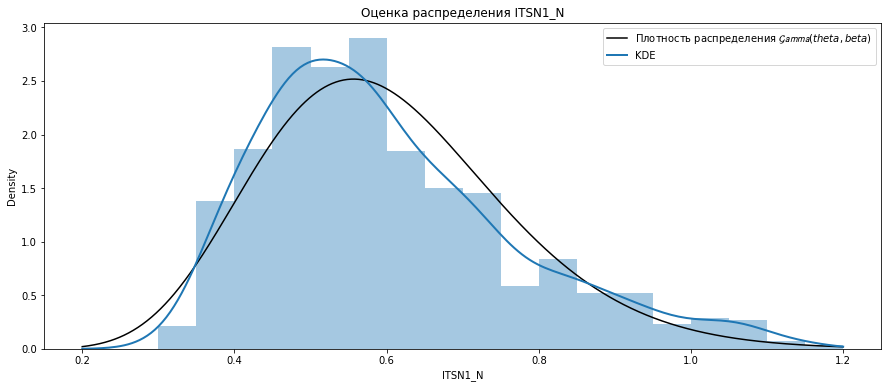

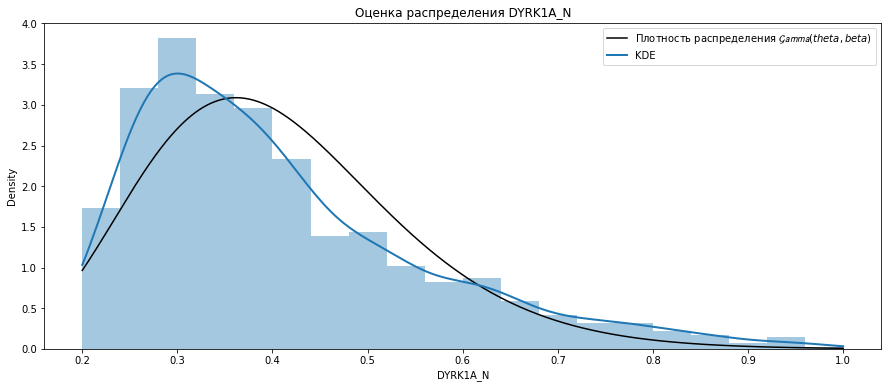

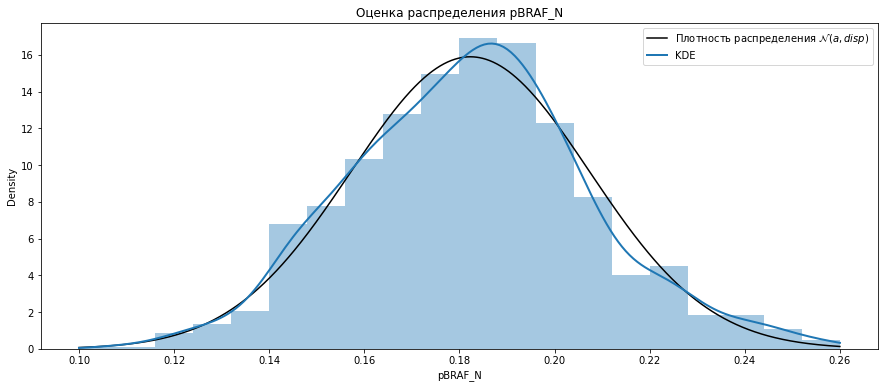

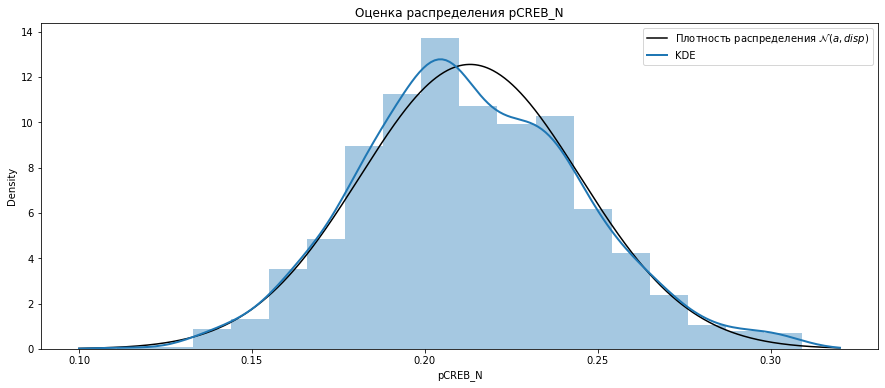

In [36]:
for column, column_range in ranges_without_outliers.items():
    if column=='ITSN1_N':
        plt.figure(figsize=(15, 6))
        grid1 = np.linspace(0.2, 1.2, 1000)
        gamma_pdf_values = sps.gamma.pdf(grid1,a=13.5,scale=1/22.46327)
        plt.plot(grid1, gamma_pdf_values, color='black', label='Плотность распределения $\\mathcal{Gamma}(theta,beta)$')
        sns.distplot(df_clear[column], bins=20, hist_kws={"range": column_range}, kde_kws={"clip": column_range, "label": "KDE", "linewidth": 2})
        plt.title('Оценка распределения ' + column)
        plt.legend()
    if column=="DYRK1A_N":
        plt.figure(figsize=(15, 6))
        grid1 = np.linspace(0.2, 1, 1000)
        gamma_pdf_values = sps.gamma.pdf(grid1,a=9,scale=1/22.12035)
        plt.plot(grid1, gamma_pdf_values, color='black', label='Плотность распределения $\\mathcal{Gamma}(theta,beta)$')
        sns.distplot(df_clear[column], bins=20, hist_kws={"range": column_range}, kde_kws={"clip": column_range, "label": "KDE", "linewidth": 2})
        plt.title('Оценка распределения ' + column)
        plt.legend()
    if column=="pBRAF_N":
        plt.figure(figsize=(15, 6))
        grid1 = np.linspace(0.1, 0.26, 1000)
        norm_pdf_values = sps.norm.pdf(grid1,loc=0.18228,scale=0.00063**(1/2))
        plt.plot(grid1, norm_pdf_values, color='black', label='Плотность распределения $\\mathcal{N}(a,disp)$')
        sns.distplot(df_clear[column], bins=20, hist_kws={"range": column_range}, kde_kws={"clip": column_range, "label": "KDE", "linewidth": 2})
        plt.title('Оценка распределения ' + column)
        plt.legend()
    if column=="pCREB_N":
        plt.figure(figsize=(15, 6))
        grid1 = np.linspace(0.1, 0.32, 1000)
        norm_pdf_values = sps.norm.pdf(grid1,loc=0.21306,scale=0.00101**(1/2))
        plt.plot(grid1, norm_pdf_values, color='black', label='Плотность распределения $\\mathcal{N}(a,disp)$')
        sns.distplot(df_clear[column], bins=20, hist_kws={"range": column_range}, kde_kws={"clip": column_range, "label": "KDE", "linewidth": 2})
        plt.title('Оценка распределения ' + column)
        plt.legend()

**Вывод**
Хоть KDE лучше аппроксимирует нашу гистограмму, стоит отметить, что графики распределений, полученные на основании ОМП хорошо аппроксимируют наши гистограммы+их смысл не в том, чтобы полностью соответствовать гистограммам, а показывать общую закономерность распределния. Кажется, ОМП неплохо сработал

**2.**


Реализуйте функции, возвращающие значения функции правдоподобия  и логарифмической функции правдоподобия для гамма распределения с параметрам $\theta, \beta$. Функция принимает реализацию выборки и параметры. Логарифмическую функцию реализуйте с использованием формулы после ее упрощения, а не как взятие функции логарифма от уже вычисленного значения функции правдоподобия.

Для получения частичного балла можно использовать методы `pdf` и `logpdf` для плотности и логарифма плотности распределения в `scipy.stats`, для получения полного балла функции формулу нужно реализовать самостоятельно.

Для подсчета гамма-функции в знаменателе плотности распределения используйте `scipy.special.gamma`, а для подсчета логарифма гамма-функции &mdash; `scipy.special.loggamma`. 



In [44]:
import scipy  #в яндекс контесте у меня без сокращений просто было сделано, а осталось 40мин, не хочу переделывать :/
def gamma_likelihood(x: np.ndarray, theta: float, beta: float) -> float:
    return np.prod((np.power(np.ones(len(x))*np.exp(-theta), x))*(theta**beta)*(np.power(x, np.ones(len(x))*(beta-1)))/scipy.special.gamma(beta))
def gamma_loglikelihood(x: np.ndarray, theta: float, beta: float) -> float:
    return len(x)*beta*np.log(theta)-len(x)*scipy.special.loggamma(beta)+(beta-1)*np.sum(np.log(x))-theta*np.sum(x)

Выведите следующие значения:
- функции правдоподобия;
- логарифма, взятого от функции правдоподобия;
- логарифмической функции правдоподобия

на следующих реализациях выборок:
- `np.ones(5)*5` &mdash; 5 пятерок;
- `np.ones(500)*5`&mdash; 500 пятерок;
- `np.ones(500)*5`&mdash; 5000 пятерок;
- `np.ones(5)*500`.

Параметр $\beta$ положите равным 10, параметр $\theta$ положите равным 2.

Сделайте выводы. Какую функцию лучше вычислять на практике?


In [51]:
theta=2
beta=10
x1=np.ones(5)*5
x2=np.ones(500)*5
x3=np.ones(5000)*5
x4=np.ones(5)*500
print(f'реализация x1: {gamma_likelihood(x1,theta,beta),gamma_loglikelihood(x1,theta,beta)}')
print(f'реализация x2: {gamma_likelihood(x2,theta,beta),gamma_loglikelihood(x2,theta,beta)}')
print(f'реализация x3: {gamma_likelihood(x3,theta,beta),gamma_loglikelihood(x3,theta,beta)}')
print(f'реализация x4: {gamma_likelihood(x4,theta,beta),gamma_loglikelihood(x4,theta,beta)}')

реализация x1: (0.000980868344433643, -6.927072312875559)
реализация x2: (1.4490116504601678e-301, -692.7072312875589)
реализация x3: (0.0, -6927.072312875585)
реализация x4: (0.0, -4749.694413943412)


**Вывод**
Конкретно в этом случае более информативной кажется логарифмическая функция правдоводобия. Например, функция правдоподобия без логарифма вообще не отличима для 3 и 4 выборок, а из логарифмической видно, что выборка номер 3 больше похожа на давнное распределение

**3.** 

Теперь подберем параметр $\beta$ для гамма-распределения с помощью перебора. 

Рассмотрите признаки 'ITSN1_N', 'DYRK1A_N'. В каждом случае сгенерируйте одномерную сетку (grid) и переберите параметр $\beta$ по сетке с шагом $10^{-4}$. Пределы сетки установите сами по смыслу. Вычислите для каждого $\beta$  параметр $\theta$ по теоретической формуле, которую вы реализовали в прошлой части задачи. Посчитайте (логарифмическую) функцию правдоподобия для полученных параметров $\beta, \theta$ и выберите наилучший параметр на основании значений этой функции.  Выведите значения полученных параметров с точностью 4 знака после запятой.

Также постройте графики зависимости значений функций правдоподобия от $\beta$. Сделайте вывод.

Для избавления от копипаста используйте циклы и функции. Копипаст является серезным источником ошибок на практике.

**Вывод**

Постройте для каждого признака на одном графике гистограмму каждого признака, график ядерной оценки плотности и график плотности распределения с параметрами, являющимися полученной ОМП. Графики для разных признаков стройте на разных графиках, но в одном окне. Сравните получившиеся результаты с результатами, полученным в первой части задачи. Сделайте выводы.

**Вывод**